# Objective: 

* Explore the dataset and extract insights using Exploratory Data Analysis
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Using Statistical evidence verify if the proportion of smokers is significantly different across different regions
* Using Statistical evidence verify if the mean BMI of women with no children, one child, and two children are the same

# Data:
Data file :AxisInsurance.csv
* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges - Individual medical costs billed to health insurance

### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) #to add nice background to the graphs
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

### Read the dataset

In [2]:
data = pd.read_csv('AxisInsurance.csv')

In [3]:
#copying data to another variable to avoid changes to original data
axis=data.copy()

### View the first and last 5 rows of the dataset

In [4]:
axis.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
axis.tail() # Exploring the last 5 rows of the data set

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understand the shape of the data

In [6]:
axis.shape

(1338, 7)

* Dataset has 1338 rows and 7 columns.

### Check the datatypes of the columns for the dataset

In [7]:
axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Fixing the data types
* sex,smoker and region are of object type, we can change them to categories.
* children even though given as numerical can be considred as categorical datatype

In [8]:
axis["sex"]=axis["sex"].astype("category")
axis["smoker"]=axis["smoker"].astype("category")
axis["region"]=axis["region"].astype("category")
axis["children"]=axis["children"].astype("category")

In [9]:
axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


* sex,smoker,region & children has been converted to categories

### Label Encoding of Categorical Data

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
axis['smoker_id'] = le.fit_transform(axis['smoker'])
axis['sex_id'] = le.fit_transform(axis['sex'])
axis['region_id'] = le.fit_transform(axis['region'])
axis['children_id'] = le.fit_transform(axis['children'])
axis.head()

,age,sex,bmi,children,smoker,region,charges,smoker_id,sex_id,region_id,children_id
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2,3
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0


### Obtain a statistical summary of the dataset

In [11]:
axis.describe()

,age,bmi,charges,smoker_id,sex_id,region_id,children_id
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.204783,0.505232,1.515695,1.094918
std,14.049960,6.098187,12110.011237,0.403694,0.500160,1.104885,1.205493
min,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,4740.287150,0.000000,0.000000,1.000000,0.000000
50%,39.000000,30.400000,9382.033000,0.000000,1.000000,2.000000,1.000000
75%,51.000000,34.693750,16639.912515,0.000000,1.000000,2.000000,2.000000
max,64.000000,53.130000,63770.428010,1.000000,1.000000,3.000000,5.000000


* Mean of age,bmi  are approx equal to median
* Mean of charges is greater than median,indicating this variable is right skewed
* There is a big difference between min and max bmi


In [12]:
axis.describe(include=["category"])

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


* There are more males than females
* There are more non smokers than smokers
* Southeast region is the most frequently occuring region
* The top most number insured for children is 0

### Checking for missing values

In [13]:
axis.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
smoker_id      0
sex_id         0
region_id      0
children_id    0
dtype: int64

* There are no missing values in the dataset

## EDA

### Univariate Analysis

In [14]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=T, ax=ax_hist2, bins=bins,palette="pastel") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-') # Add median to the histogram

### Analysis of Age

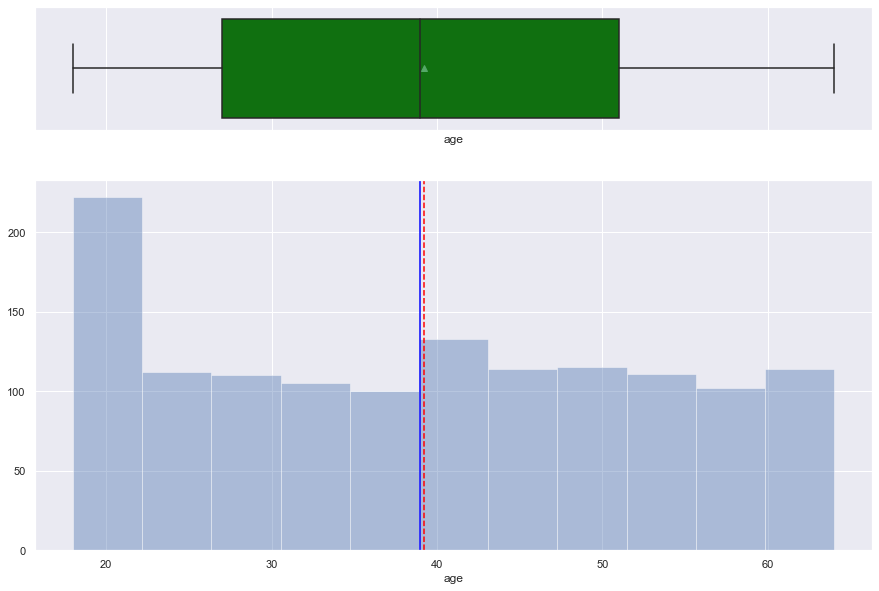

In [15]:
histogram_boxplot(axis["age"])

* The mean and median are approx equal
* 75% of primary beneficiaries are below age 51

### Analysis of bmi

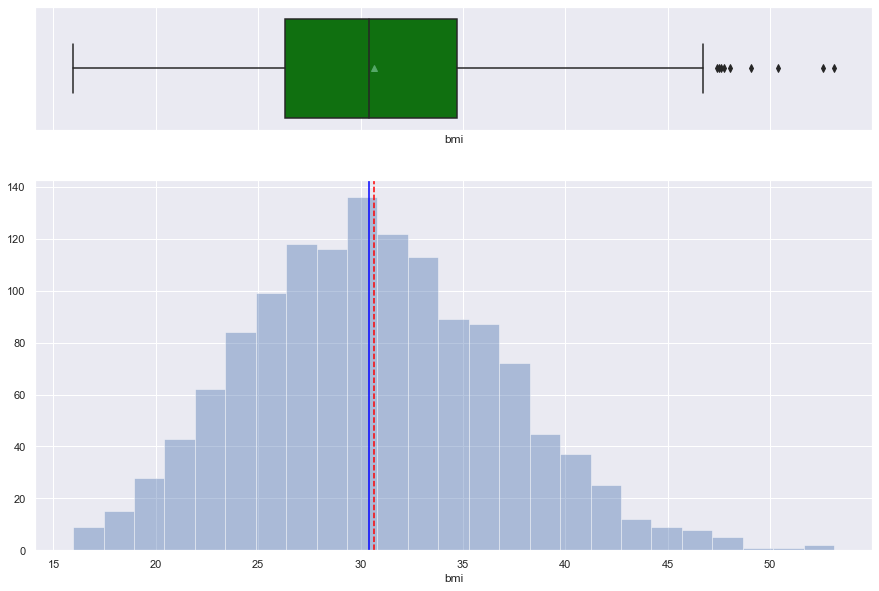

In [16]:
histogram_boxplot(axis["bmi"])

* 50 percent of the people have bmi of around 30 which is more than the ideal bmi
* We can see many outliers for this variable
* Mean and median are aprrox equal
* bmi ranges from values 16 to 53

### Analysis of charges

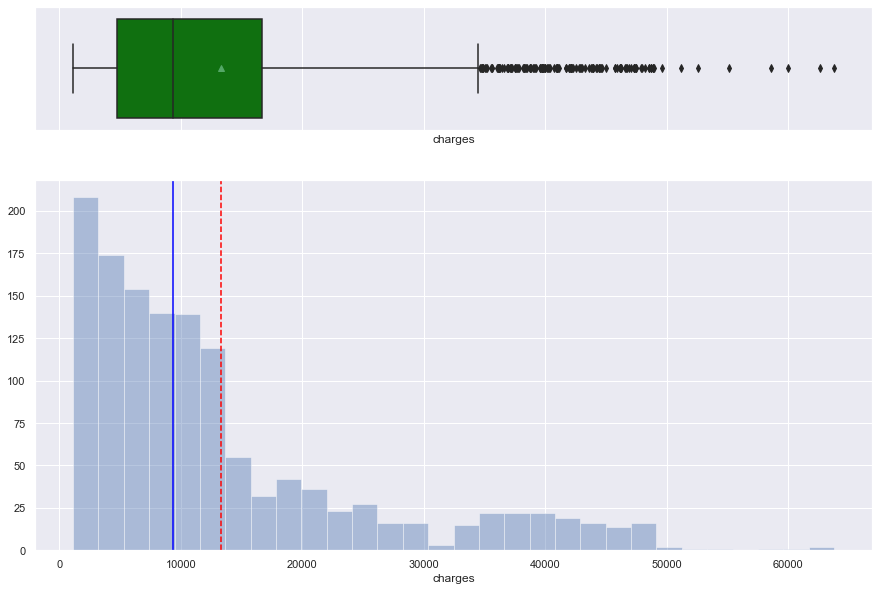

In [17]:
histogram_boxplot(axis["charges"])

* The distribution is right skewed
* There are many outliers present for this variable
* 50% of people have charges around 9000 billed to health insurance


In [18]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Analysis of sex

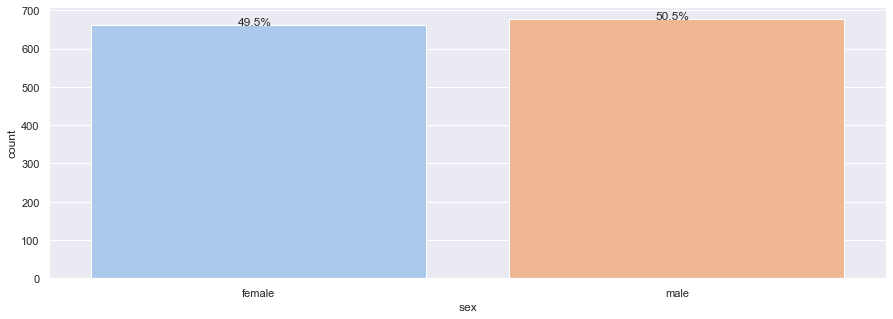

In [19]:
plt.figure(figsize=(15,5))# setting size for the plot
ax = sns.countplot(axis["sex"],palette='pastel')
perc_on_bar(ax,axis["sex"])

* There are more male policy holders than female policy holders

### Analysis of smoker

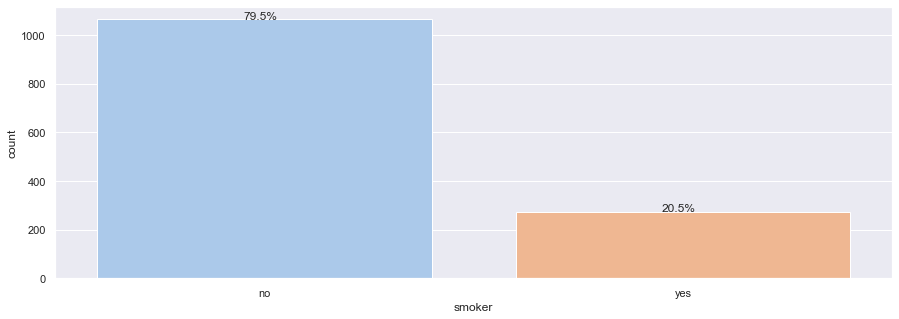

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(axis["smoker"],palette='pastel')
perc_on_bar(ax,axis["smoker"])

* More number of insured are non smokers(79.5%) than smokers(20.5%)

### Analysis of region

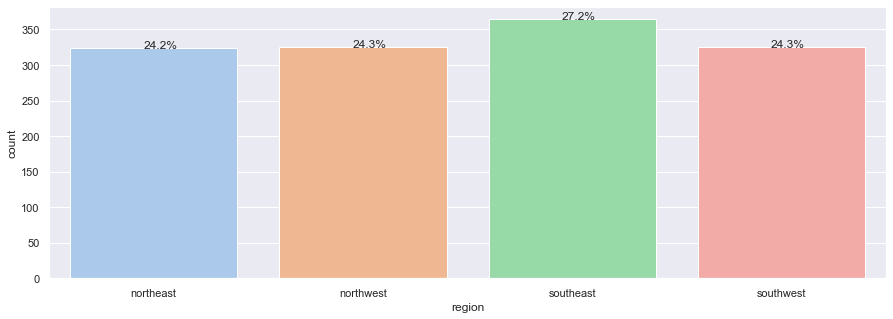

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(axis["region"],palette='pastel')
perc_on_bar(ax,axis["region"])

* Higher number of people under the insurance live in the south east region(27.2%),followed by southwest and northwest regions(both 24.3%)
* Northeast has the lowest number of people(24.2%) living who are insured in the policy

### Analysis of children

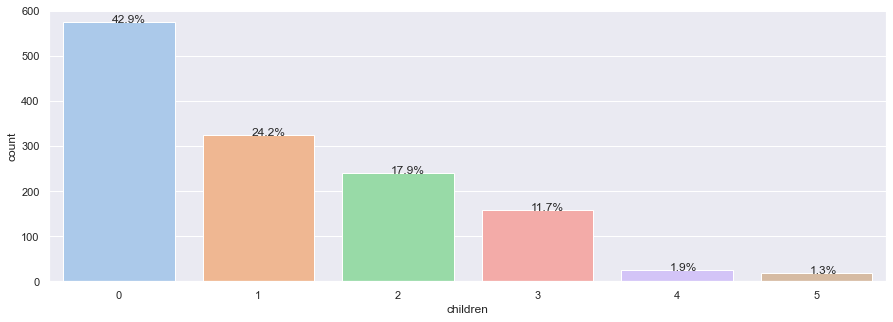

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(axis["children"],palette='pastel')
perc_on_bar(ax,axis["children"])


* The max number of children covered by insurance is 5

* 42.9% people have no children covered by the insurance plan

## Bivariate Analysis

### Checking the correlation of the numerical variables using a heatmap

In [ ]:
plt.figure(figsize=(15,10))# Setting the fig size of the plot
sns.heatmap(axis.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 ) 
plt.show()# showing the plot

* There is a high positive correlation between smoking and charges indicating that being a smoker leads to very high medical charges
* There is a weak positive correlation between age and charges indicating charges increase slightly with age
* There is a weak positive correlation between bmi and charges indicating charges increase slightly with higher bmi
* Other variables have significantly low correlation with each other



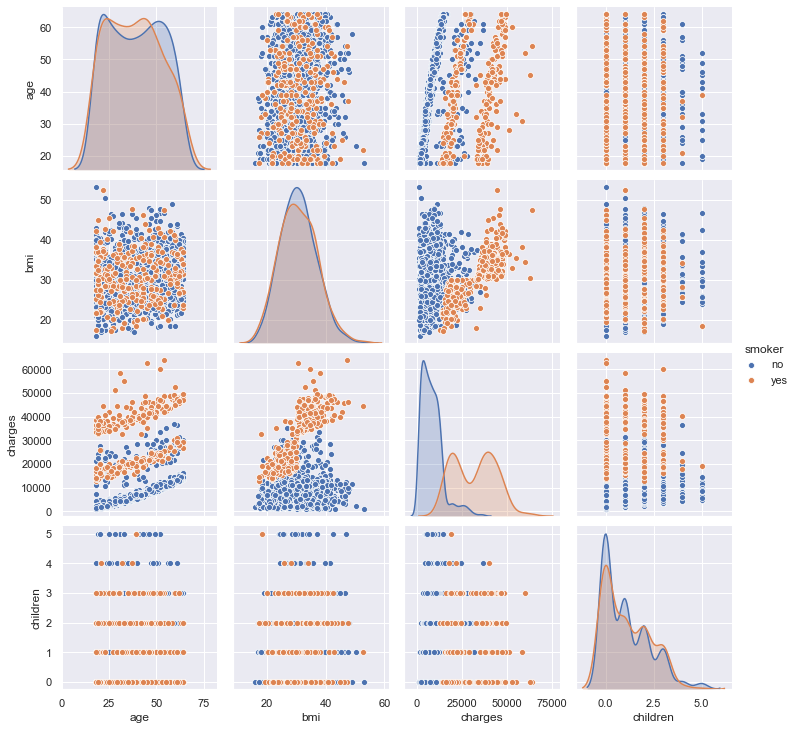

In [24]:
sns.pairplot(axis[['age','bmi','charges','smoker','sex','region','children']],hue='smoker')#Only selecting the required variables to plot
plt.show()



* We can see the insured who regularly smokes has higher charges billed to insurance
* Also with age charges billed to insurance increases

### Analysing how individual medical cost(charges) is influenced by the different variables

### Charge vs Age

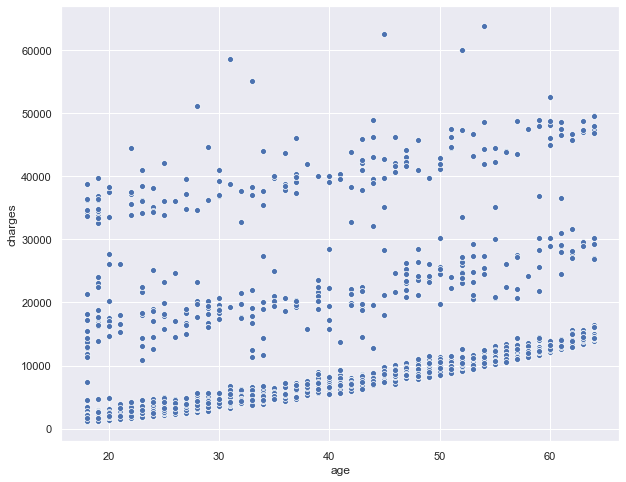

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(axis["age"],axis["charges"])
plt.show()

* Medical costs increases with age.But there could be other variables along with age that would make the medical cost high. Need to analyse further

### Charges vs bmi

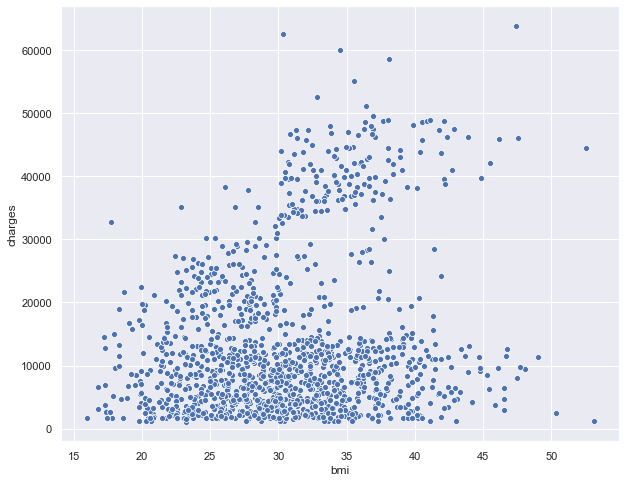

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(axis["bmi"],axis["charges"])
plt.show()

* Charges are higher for people with bmi greater than 30

### Charges vs Smoker

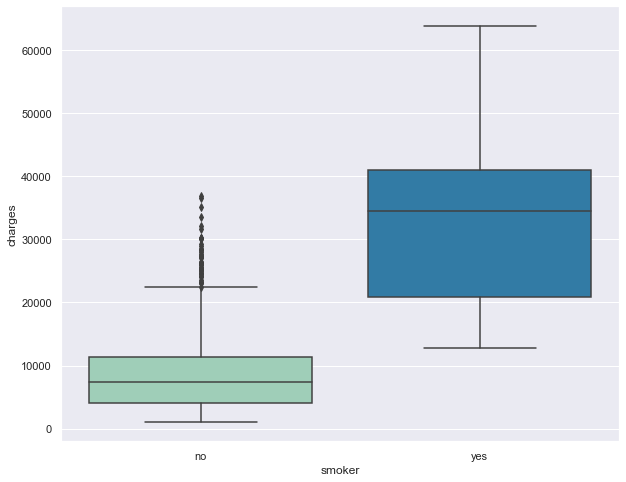

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(axis["smoker"],axis["charges"],palette="YlGnBu")
plt.show()

* Here we can see smokers have significantly higher insurance charges compared to non smokers and the min amount for smokers is higher than 10000
* There are some outliers in terms of charges for non smokers.Need further analysis

### Charges vs Region

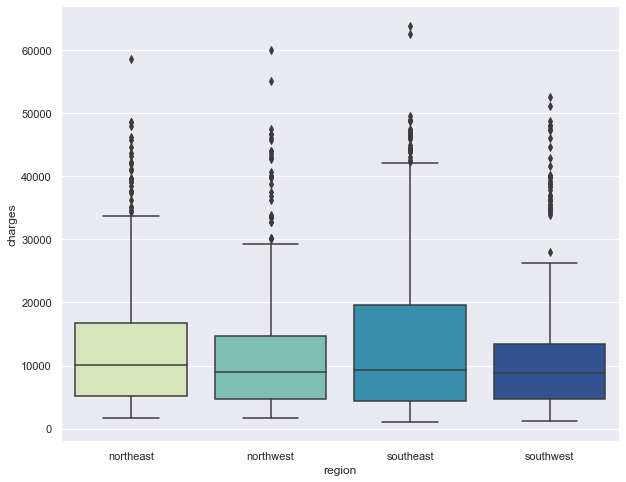

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(axis["region"],axis["charges"],palette="YlGnBu")
plt.show()

* southeast region has some of the higher medical costs.Also for this region we can see outliers with more than 60000 cost

### Charge vs Children

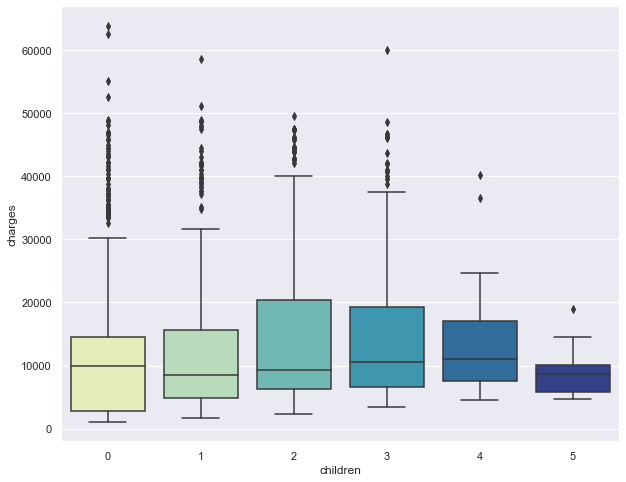

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(axis["children"],axis["charges"],palette="YlGnBu")
plt.show()

* Having 5 children insured contributes to less charges.Charges are more when 2 children are insured

### Charges vs sex

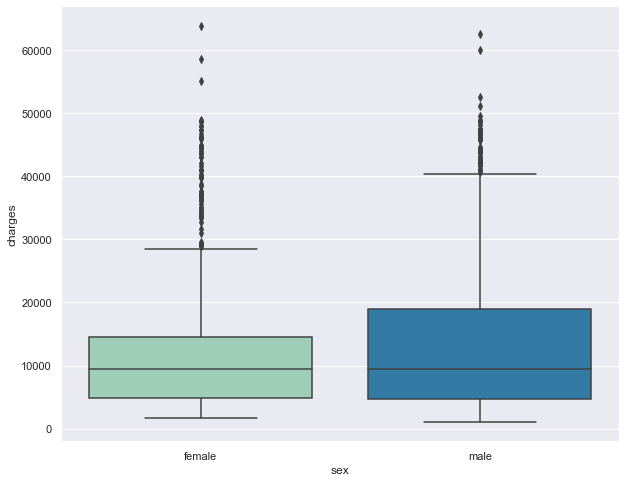

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(axis["sex"],axis["charges"],palette="YlGnBu")
plt.show()

* Males have higher charges than females.But we can also see that its a female who has the highest charges of above 60000

### Bmi vs Sex

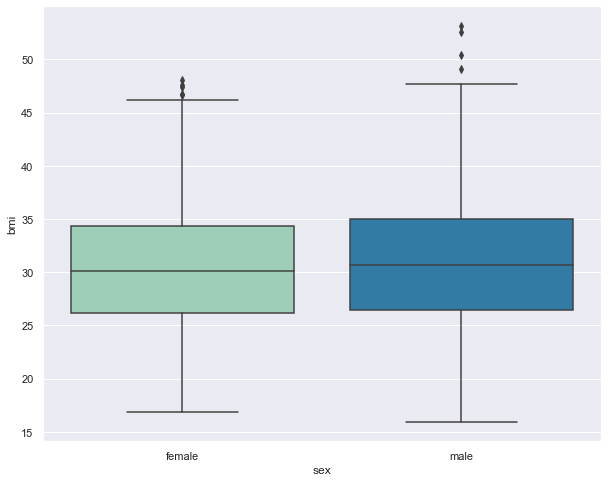

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(axis["sex"],axis["bmi"],palette="YlGnBu")
plt.show()

* BMI of males and females are approx equal.We can also see few outlier values (>50 bmi) for males

### Bmi vs Smoker

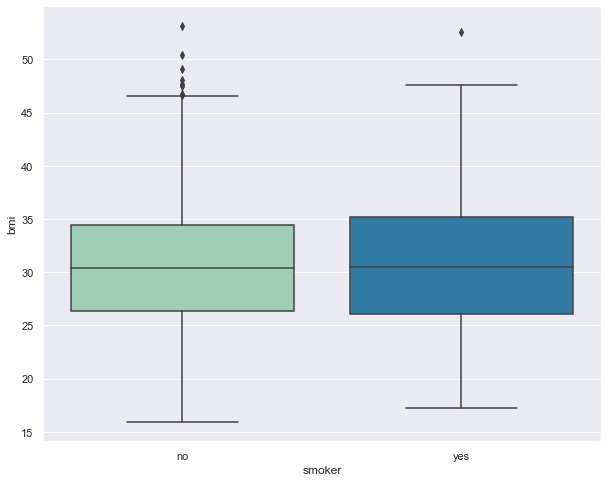

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(axis["smoker"],axis["bmi"],palette="YlGnBu")
plt.show()

* There is no significant increase in bmi for smokers compared to non smokers

### Smoker vs sex

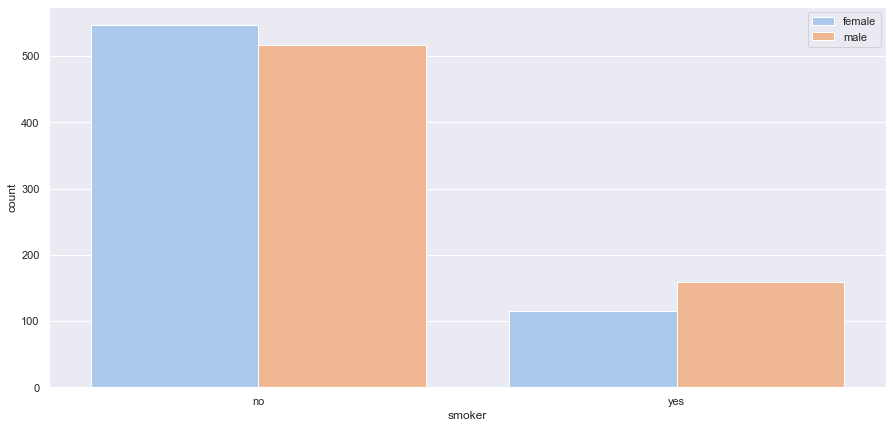

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(axis["smoker"],hue=axis["sex"],palette='pastel')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* There are more male smokers than female smokers which could be contributing to the higher charges among men


### Smoker vs Region

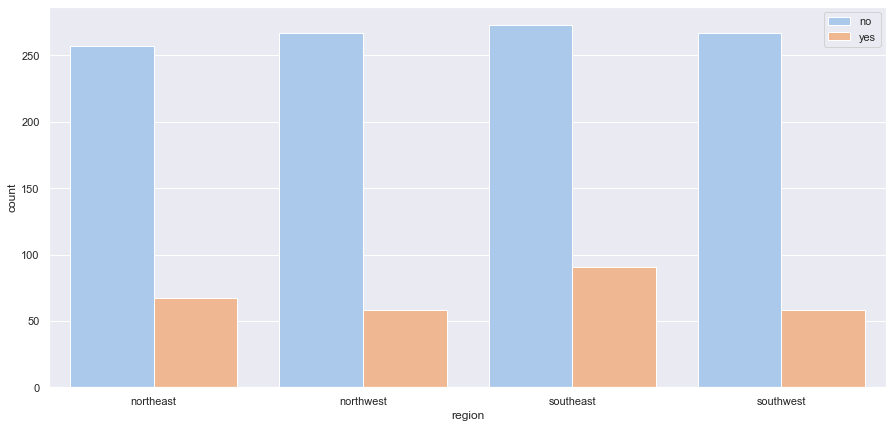

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(axis["region"],hue=axis["smoker"],palette='pastel')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* There are slightly more number of smokers in the southeast region
* Non smokers are comparatively same across regions with slight differences

### Grouping data w.r.t regions

In [35]:
axis[axis["region"]=="southeast"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges,smoker_id,sex_id,region_id,children_id
count,364.000000,364,364.000000,364.0,364,364,364.000000,364.000000,364.000000,364.0,364.000000
unique,NaN,2,NaN,6.0,2,1,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,0.0,no,southeast,NaN,NaN,NaN,NaN,NaN
freq,NaN,189,NaN,157.0,273,364,NaN,NaN,NaN,NaN,NaN
mean,38.939560,NaN,33.355989,NaN,NaN,NaN,14735.411438,0.250000,0.519231,2.0,1.049451
std,14.164585,NaN,6.477648,NaN,NaN,NaN,13971.098589,0.433609,0.500318,0.0,1.177276
min,18.000000,NaN,19.800000,NaN,NaN,NaN,1121.873900,0.000000,0.000000,2.0,0.000000
25%,26.750000,NaN,28.572500,NaN,NaN,NaN,4440.886200,0.000000,0.000000,2.0,0.000000
50%,39.000000,NaN,33.330000,NaN,NaN,NaN,9294.131950,0.000000,1.000000,2.0,1.000000
75%,51.000000,NaN,37.812500,NaN,NaN,NaN,19526.286900,0.250000,1.000000,2.0,2.000000


### SouthEast region Insurance Customer characteristics

* Most of the Insured fall in the Age group of mid 20's to 50s
* Higher number of male policy holders.Also higher number of males compared to southwest and northeast regions
* 50% of the policy holders does not have ideal bmi.The bmi number is higher compared to other 3 regions
* Frequency of non smokers is higher.Has the highest number of non smokers compared to other regions
* Has the highest charges for individual medical cost

In [36]:
axis[axis["region"]=="southwest"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges,smoker_id,sex_id,region_id,children_id
count,325.000000,325,325.000000,325.0,325,325,325.000000,325.000000,325.000000,325.0,325.000000
unique,NaN,2,NaN,6.0,2,1,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,0.0,no,southwest,NaN,NaN,NaN,NaN,NaN
freq,NaN,163,NaN,138.0,267,325,NaN,NaN,NaN,NaN,NaN
mean,39.455385,NaN,30.596615,NaN,NaN,NaN,12346.937377,0.178462,0.501538,3.0,1.141538
std,13.959886,NaN,5.691836,NaN,NaN,NaN,11557.179101,0.383491,0.500769,0.0,1.275952
min,19.000000,NaN,17.400000,NaN,NaN,NaN,1241.565000,0.000000,0.000000,3.0,0.000000
25%,27.000000,NaN,26.900000,NaN,NaN,NaN,4751.070000,0.000000,0.000000,3.0,0.000000
50%,39.000000,NaN,30.300000,NaN,NaN,NaN,8798.593000,0.000000,1.000000,3.0,1.000000
75%,51.000000,NaN,34.600000,NaN,NaN,NaN,13462.520000,0.000000,1.000000,3.0,2.000000


### Southwest region Insurance Customer characteristics

* Most of the Insured fall in the Age group of upper 20's to 50s
* Higher number of male policy holders
* 50% of the policy holders does not have ideal bmi but better compared to southeast region
* Frequency of non smokers is higher
* Has the lowest max charges compared to other regions

In [37]:
axis[axis["region"]=="northeast"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges,smoker_id,sex_id,region_id,children_id
count,324.000000,324,324.000000,324.0,324,324,324.000000,324.00000,324.000000,324.0,324.000000
unique,NaN,2,NaN,6.0,2,1,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,0.0,no,northeast,NaN,NaN,NaN,NaN,NaN
freq,NaN,163,NaN,147.0,257,324,NaN,NaN,NaN,NaN,NaN
mean,39.268519,NaN,29.173503,NaN,NaN,NaN,13406.384516,0.20679,0.503086,0.0,1.046296
std,14.069007,NaN,5.937513,NaN,NaN,NaN,11255.803066,0.40563,0.500764,0.0,1.198949
min,18.000000,NaN,15.960000,NaN,NaN,NaN,1694.796400,0.00000,0.000000,0.0,0.000000
25%,27.000000,NaN,24.866250,NaN,NaN,NaN,5194.322288,0.00000,0.000000,0.0,0.000000
50%,39.500000,NaN,28.880000,NaN,NaN,NaN,10057.652025,0.00000,1.000000,0.0,1.000000
75%,51.000000,NaN,32.893750,NaN,NaN,NaN,16687.364100,0.00000,1.000000,0.0,2.000000


### Northeast region Insurance Customer characteristics

* Most of the Insured fall in the Age group of upper 20's to 50s
* Higher number of male policy holders
* bmi of policy holders is better compared to southeast and southwest regions
* Frequency of non smokers is higher

In [38]:
axis[axis["region"]=="northwest"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges,smoker_id,sex_id,region_id,children_id
count,325.000000,325,325.000000,325.0,325,325,325.000000,325.000000,325.000000,325.0,325.000000
unique,NaN,2,NaN,6.0,2,1,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,0.0,no,northwest,NaN,NaN,NaN,NaN,NaN
freq,NaN,164,NaN,132.0,267,325,NaN,NaN,NaN,NaN,NaN
mean,39.196923,NaN,29.199785,NaN,NaN,NaN,12417.575374,0.178462,0.495385,1.0,1.147692
std,14.051646,NaN,5.136765,NaN,NaN,NaN,11072.276928,0.383491,0.500750,0.0,1.171828
min,19.000000,NaN,17.385000,NaN,NaN,NaN,1621.340200,0.000000,0.000000,1.0,0.000000
25%,26.000000,NaN,25.745000,NaN,NaN,NaN,4719.736550,0.000000,0.000000,1.0,0.000000
50%,39.000000,NaN,28.880000,NaN,NaN,NaN,8965.795750,0.000000,0.000000,1.0,1.000000
75%,51.000000,NaN,32.775000,NaN,NaN,NaN,14711.743800,0.000000,1.000000,1.0,2.000000


### Northwest region Insurance Customer characteristics

* Most of the Insured fall in the Age group of mid 20's to 50s
* Higher number of female policy holders
* bmi of policy holders is better compared to other regions
* Frequency of non smokers is higher

## Multivariate Analysis

Let us analyse the different variables together to understand which all factors lead to higher charges for insurance

### Age vs Sex vs Smoker

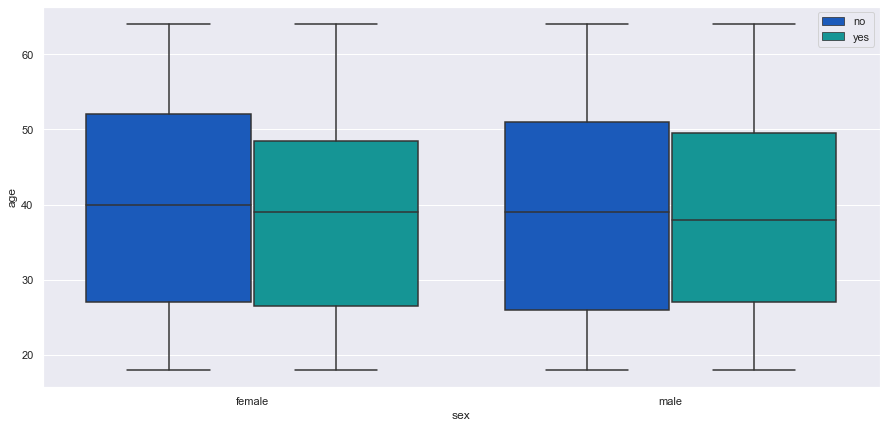

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["sex"],axis["age"],hue=axis["smoker"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* There are more non smokers than smokers for both male and female policy holders

### Bmi vs Sex vs Smoker

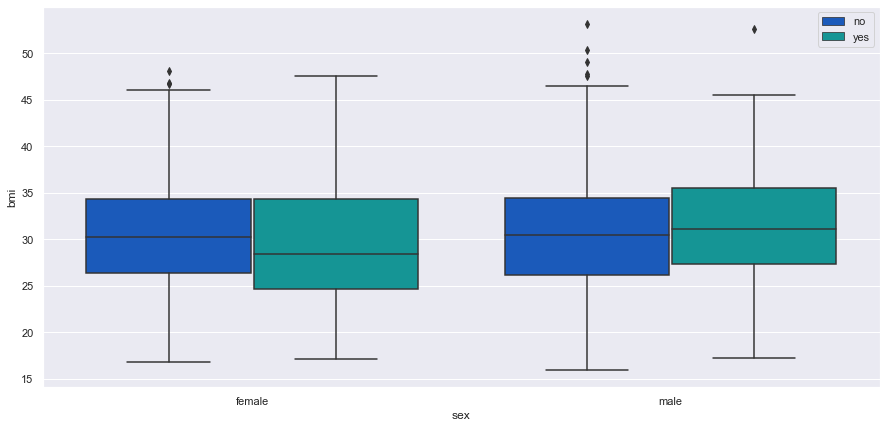

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["sex"],axis["bmi"],hue=axis["smoker"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Male smokers have slightly higher bmi than non smokers whereas for females both are almost compareable
* There is not much difference in bmi for females and males

### Charges vs Sex vs Smoker

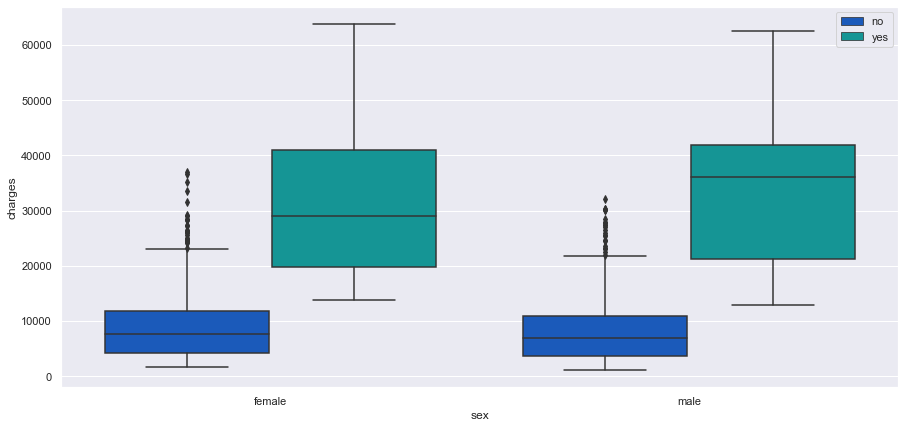

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["sex"],axis["charges"],hue=axis["smoker"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Charges for both male and female smokers are much higher than non smokers

### Charges vs regions vs smoker

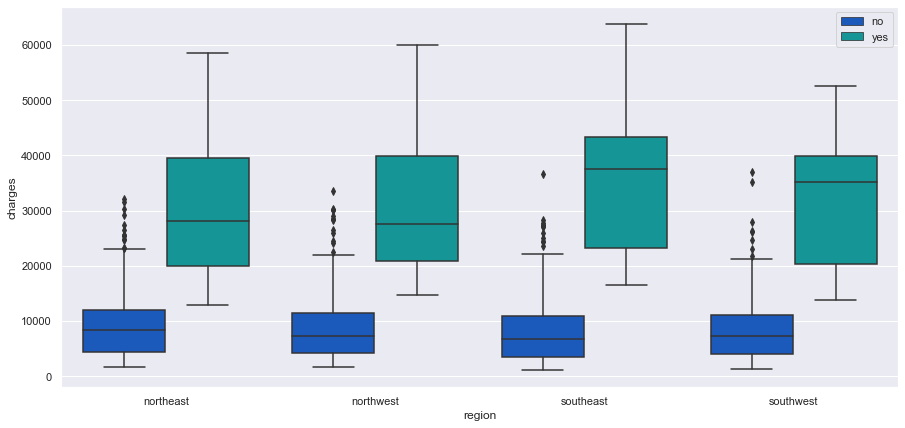

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["region"],axis["charges"],hue=axis["smoker"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* All of the regions have higher charges for smokers with charges being highest for southeast region

### bmi vs region vs smoker

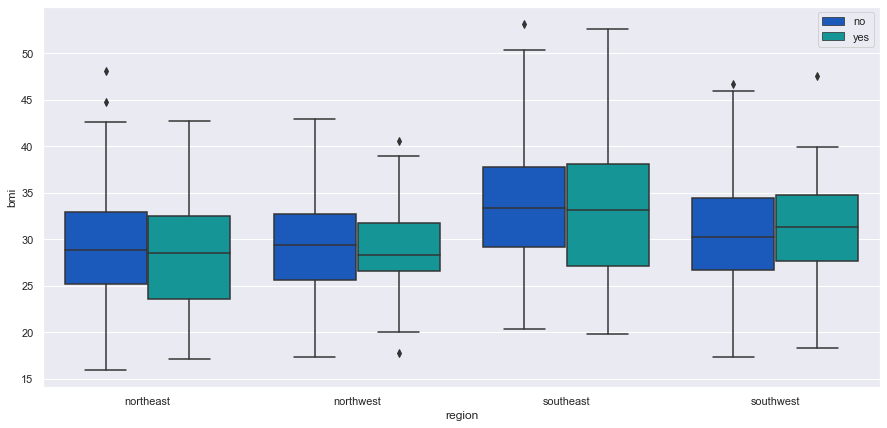

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["region"],axis["bmi"],hue=axis["smoker"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* BMI of policy holders in southeast region is the highest

### Charge vs region vs sex

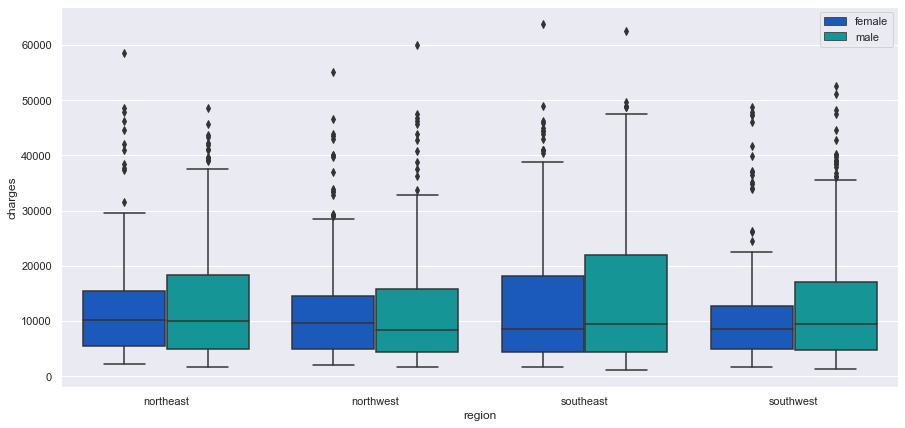

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["region"],axis["charges"],hue=axis["sex"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* For all of the regions we can see that charges are higher for males than females with southeast region having the highest charges for both males and females

### Bmi vs region vs sex

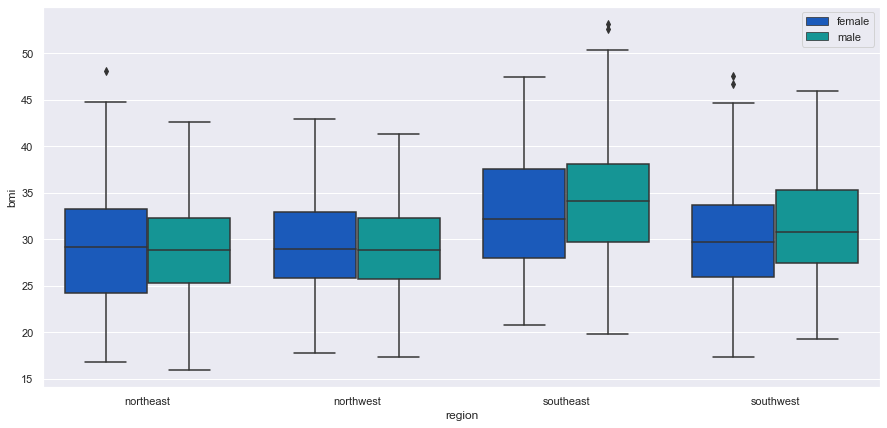

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["region"],axis["bmi"],hue=axis["sex"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Southeast region has highest bmi for both males and females than all other regions

### Age vs region vs sex

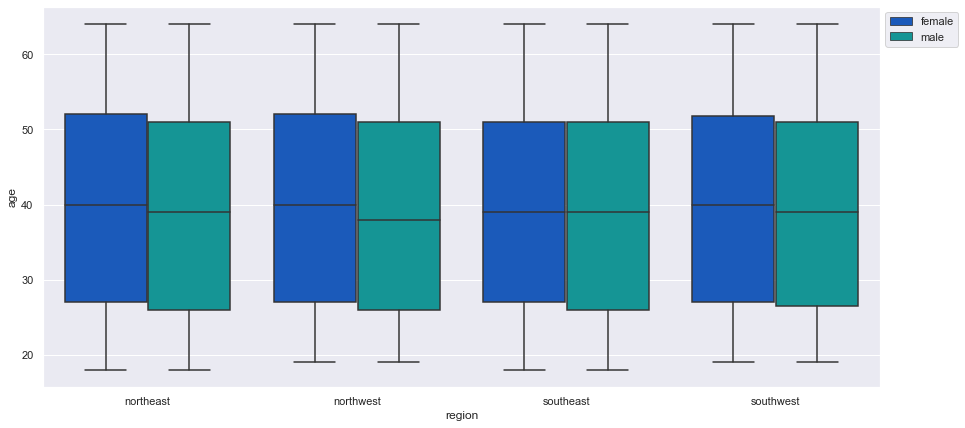

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(axis["region"],axis["age"],hue=axis["sex"],palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Age ranges for Insured policy holders are similar across all four regions 

### Bmi vs children vs sex

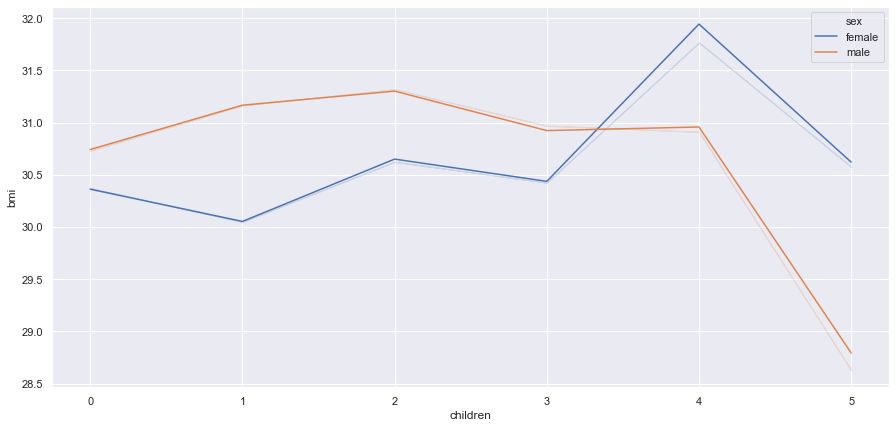

In [47]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["children"],axis["bmi"],hue=axis["sex"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* BMI is highest for women with 4 children 

### Smoker vs Bmi vs Age

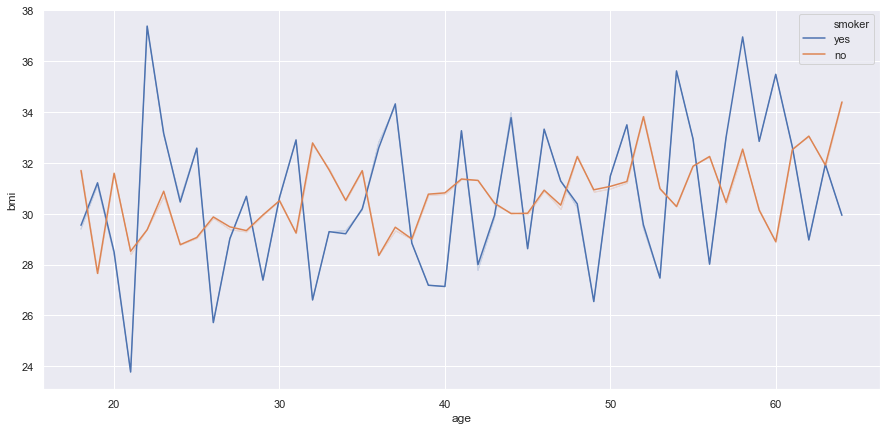

In [48]:
plt.figure(figsize=(15,7))
sns.lineplot(axis["age"],axis["bmi"],hue=axis["smoker"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* We can see some high values for bmi for smokers in the 20's

### Charges vs bmi vs smoker

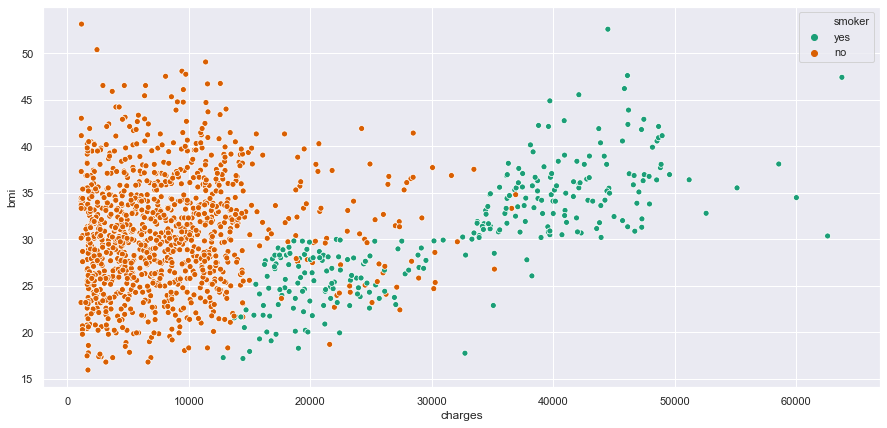

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(axis["charges"],axis["bmi"],hue=axis["smoker"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Charges for smokers are higher compared to non smokers

### Conclusions based on EDA
Lets see if we can answer some of the key questions based on the EDA that we performed and also draw any other insights 

* Factors that lead to higher medical charges are age, BMI and also if the policy holder is a regular tobacco user led to having increased charges.Charges are very high for smokers compared to non smokers
* Males have higher charges than females
* There is no significant difference between BMI of males and females
* Smoking is higher in males than females and this could be one of the reasons for higher medical cost among men
* Among the regions southeast region has the highest number of smokers and also people with higher bmi's .This would explain the higher amount of charges we see for this region compared to the other regions
* Women with 4 children has the highest BMI


## Hypothesis Testing

## Q. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

### Step1: Define null and alternate hypothesis

* Null hypothesis  $H_0$: medical claims made by people who smoke is less than or equal to people who do not smoke
* $H_0$: $\mu$(s)<= $\mu$(n)

* Alternate hypothesis  $H_A$:medical claims made by people who smoke is greater than people who do not smoke

* $H_A$: $\mu$(s) > $\mu$(n)
* $\mu$(s) = mean charges of smokers
* $\mu$(s) = mean charges of non smokers
### This is a one-tailed test

### Step 2: Decide the significance level

Requirement states to consider significance level of 0.05, so
$\alpha$ =0.05

### Step 3: Identify the test statistic

We do not know the population standard deviation, so we use the t distribution and the $t_{STAT}$ test statistic(2 sample t-test).

In [50]:
smoker = axis[axis['smoker_id']==1] # Assigning all policy holders who are smokers to dataframe 'smoker'
non_smoker = axis[axis['smoker_id']==0] # Assigning all policy holders who are non smokers to a dataframe 'non_smoker'
charge_smokers = smoker['charges'] #Assigning all smoker charges to df charge_smokers
charge_nonsmokers = non_smoker['charges'] #Assigning all non smoker charges to df charge_nonsmokers


In [51]:
charge_smokers.reset_index(drop=True, inplace=True)# resetting index values
charge_nonsmokers.reset_index(drop=True, inplace=True)# resetting index values

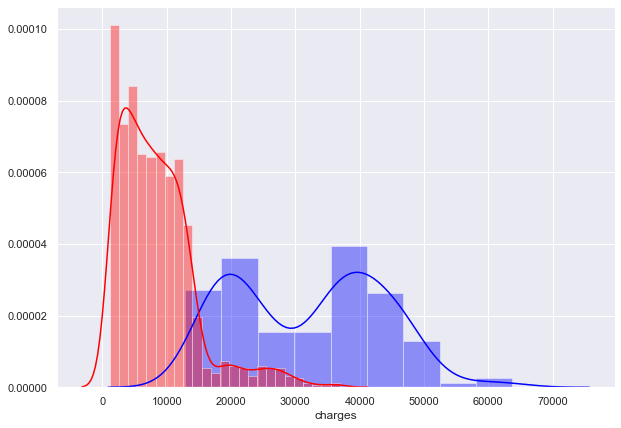

In [52]:
plt.figure(figsize=(10,7))
sns.distplot(charge_smokers,color="blue") # plotting histogram for charges for smokers and non smokers
sns.distplot(charge_nonsmokers,color="red")
plt.show()

We can see from the plot that charges for smokers is higher than for non smokers

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_ind calculates the t test for the mean of two given samples. This function returns t statistic and the p value for a two-tailed  t-test.**

In [53]:
from scipy.stats import ttest_1samp, ttest_ind # importing required packages
t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers) # #Performing a two sample t-test
print(t_statistic, p_value)# #Python gives us a two tailed test. The pvalue here is for two-tailed test.

46.664921172723716 8.271435842177219e-283


In [54]:
#The following is the pvalue for a one-tailed test.

(p_value/2)

4.1357179210886093e-283

### Step 5:Decide to reject or not to reject the null hypothesis

In [55]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value/2) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 

print ("Our two-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value is less than the Level of significance
Our two-sample t-test p-value= 4.1357179210886093e-283


Here p-value is 4.1357179210886093e-283 which is less than 0.05.Hence we reject the null hypothesis.


### So at 95% confidence level, there is  sufficient evidence  to prove that medical claims made by people who smoke is greater than people who do not smoke


## Q.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

### Step1: Define null and alternate hypothesis

* Null hypothesis  $H_0$: BMI of females is same as BMI of males
* $H_0$: $\mu$(f-bmi)= $\mu$(m-bmi)

* Alternate hypothesis  $H_A$:BMI of females is different from BMI of males

* $H_A$: $\mu$(f-bmi) $\neq$ $\mu$(m-bmi)

* $\mu$(f) = mean bmi of females
* $\mu$(m) = mean bmi of males
### This is a two-tailed test

### Step 2: Decide the significance level

Requirement states to consider significance level of 0.05, so
$\alpha$ =0.05

### Step 3: Identify the test statistic

We do not know the population standard deviation So we use the t distribution and the $t_{STAT}$ test statistic(2 Sample t test).

In [56]:
female = axis[axis['sex_id']==0] # Assigning all policy holders who are females to dataframe 'female'
male = axis[axis['sex_id']==1] # Assigning all policy holders who are males to a dataframe 'male'
bmi_female = female['bmi'] #Assigning  bmi  of females to df bmi_female
bmi_male = male['bmi'] #Assigning  bmi of males to df bmi_male

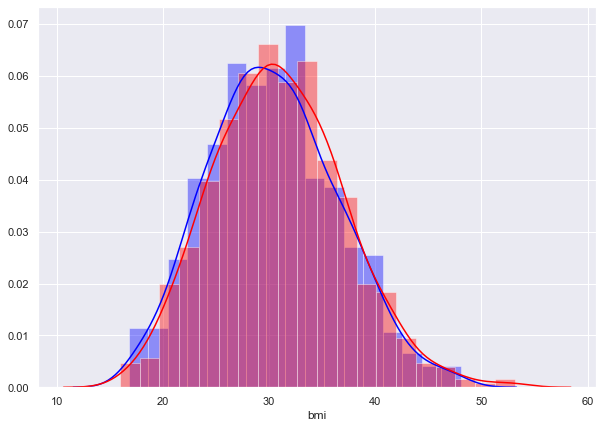

In [57]:
plt.figure(figsize=(10,7))
sns.distplot(bmi_female,color="blue") # plotting histogram for bmi of females and males
sns.distplot(bmi_male,color="red")
plt.show()

We cannot see any significant difference between bmi of females and males

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_ind calculates the t test for the mean of two given samples. This function returns t statistic and the p value for a two-tailed  t-test.**

In [58]:

t_statistic, p_value = ttest_ind(bmi_female, bmi_male) # #Performing a two sample t-test
print(t_statistic, p_value)# #Python gives us a two tailed test. The pvalue here is for two-tailed test.

-1.696752635752224 0.08997637178984932


In [59]:
p_value

0.08997637178984932

### Step 5:Decide to reject or not to reject the null hypothesis

In [60]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 

print ("Our two-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value is greater than the Level of significance
Our two-sample t-test p-value= 0.08997637178984932



### So at 95% confidence level, there is  sufficient evidence  to prove that BMI of females is same as BMI of males

## Q.Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

Lets first create a cross tab to check the number of smokers/non smokers across different regions

In [61]:
smoker_nonsmoker = pd.crosstab(index=axis["smoker"],  # Make a crosstab
                     columns=axis["region"])                
smoker_nonsmoker

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


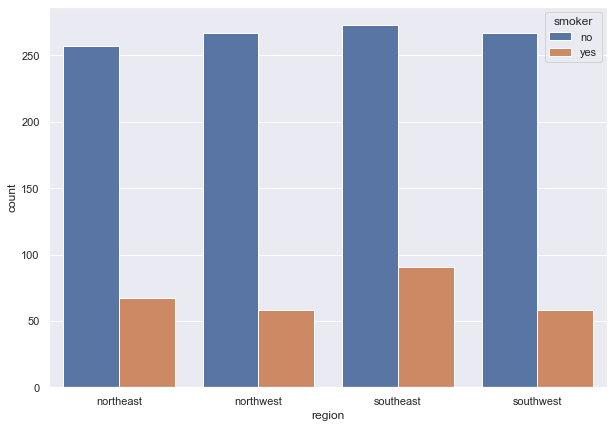

In [62]:
plt.figure(figsize=(10,7))# setting the plot size
sns.countplot(axis["region"],hue=axis["smoker"]); # plotting graph to analyse smoker vs region

We cannot find significant difference between smokers/non smokers across different regions

### Step 1: Define null and alternate hypothesis

* $H_0$:Proportion of smokers doesnot differ significantly across regions
* $H_A$:Proportion of smokers differ significantly across regions

### Step 2: Decide the significance level

Requirement states to consider significance level of 0.05, so
$\alpha$ =0.05

### Step 3: Identify the test statistic

This is a Chi-sq Test where categorical data has been reported in raw frequencies

## Step 4: Calculate the p - value and test statistic

In [63]:
from   scipy.stats import chi2_contingency   # For Chi-Sq 
chi2, p_value, dof, exp_freq = chi2_contingency(smoker_nonsmoker, correction = False)

In [64]:
p_value # displaying p_value

0.06171954839170547

In [65]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value is greater than the Level of significance


## Step 5:  Decide to reject or fail to reject null hypothesis

Since the p_value is > 0.05, therefore, at 95% confidence we fail to reject the null hypothesis which implies proportion of smokers doesnot differ significantly across regions

### Analysing only the smokers(Smoker = yes) across different regions with the same test

Lets first create a contigency table to check the number of smokers only across different regions

In [66]:
no_smokers=smoker['region'].value_counts()
print(" The no of smokers across different regions are", '\n', no_smokers )

 The no of smokers across different regions are 
 southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64


In [67]:
df = pd.DataFrame({'Southeast': [91], 'Southwest': [58],'Northeast': [67],'Northwest': [58]}, index = ['Smoker'])#create a table showing smokers across different regions
df

,Southeast,Southwest,Northeast,Northwest
Smoker,91,58,67,58


### Step 1: Define null and alternate hypothesis

* $H_0$:Proportion of smokers doesnot differ significantly across regions
* $H_A$:Proportion of smokers differ significantly across regions

### Step 2: Decide the significance level

Requirement states to consider significance level of 0.05, so
$\alpha$ =0.05

### Step 3: Identify the test statistic

This is a Chi-sq Test where categorical data has been reported in raw frequencies

## Step 4: Calculate the p - value and test statistic

In [68]:
from   scipy.stats import chi2_contingency   # For Chi-Sq 
chi2, p_value, dof, exp_freq = chi2_contingency(df, correction = False)

In [69]:
p_value

1.0

In [70]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value is greater than the Level of significance') 

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value is greater than the Level of significance


## Step 5:  Decide to reject or fail to reject null hypothesis

Since the p_value is > 0.05, therefore, at 95% confidence we fail to reject the null hypothesis which implies proportion of smokers doesnot differ significantly across regions

## Q.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

Let us first extract the data for females with children <=2

In [71]:
df2 = axis[axis['children_id']<=2] # extrating data with only 0,1,2 children and assigning it to df df2

female = df2[df2['sex_id'] == 0] # extrating data for only females from the above dataframe df2


### Creating Box plot to analyse children vs bmi for females

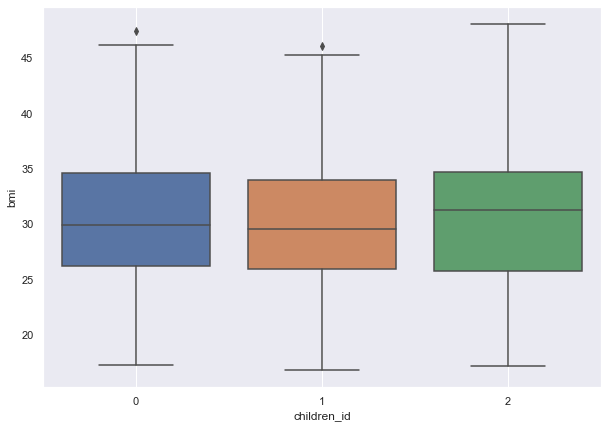

In [72]:
plt.figure(figsize=(10,7))# setting the plot size
sns.boxplot(x="children_id", y="bmi",data=female)
plt.grid()
plt.show()

* The boxplots almost similar shapes, location and spreads.

### Step 1: Define null and alternate hypothesis

* $H_0$:Mean BMI of women with no children, one child, and two children are the same $\mu$1 = $\mu$2 =$\mu$3
* $H_A$:Mean BMI of women with no children, one child, and two children are not the same  

### Step 2: Decide the significance level

Requirement states to consider significance level of 0.05, so
$\alpha$ =0.05

### Step 3: Identify the test statistic

Here we have three levels for the group children. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.Here we need to use one-way ANOVA test because we are testing categorical variable (children) against bmi which is the response variable

### Step 4: Calculate p value using ANOVA table

In [73]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

In [74]:
formula = 'bmi ~ C(children_id)'
model = ols(formula, female).fit() # ols-ordinary least square
aov_table = anova_lm(model)
print(aov_table)

                   df        sum_sq    mean_sq         F    PR(>F)
C(children_id)    2.0     24.590123  12.295062  0.334472  0.715858
Residual        563.0  20695.661583  36.759612       NaN       NaN


p_val=0.715858

## Step 5:  Decide to reject or fail to reject null hypothesis

Since the p_value(0.715858) in this scenario is greater than $\alpha$ (0.05), we fail to reject the Null Hypothesis ($H_0$) which implies at 95% confidence level there is no difference in the Mean BMI of women with no children, one child, and two children 